# HOG (Histogram of Oriented Gradients) visualization

### editor : ysmrnbt

2016/11/13

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, color, exposure
import cv2 #use opencv
import datetime
from imutils.object_detection import non_max_suppression
import numpy as np

I imported skimage to visualize HOG features.

Ref --> http://scikit-image.org/docs/dev/auto_examples/plot_hog.html

### 1. HOG visualization

Function to plot 3 figures
1. input image
2. raw hog features
3. rescaled hog features

In [6]:
def HOG_visualize(filename):
    
    image = color.rgb2gray(cv2.imread(filename)) # convert from color to gray image
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualise=True)
    
    ### plot ###
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8), sharex=True, sharey=True)

    # fig 1 (input image)
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image', color="blue")
    ax1.set_adjustable('box-forced')

    # fig 2 (hog features)
    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients', color="blue")
    ax2.set_adjustable('box-forced')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

    # fig 3(rescaled hog features)
    ax3.axis('off')
    ax3.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax3.set_title('HOG(Rescale)', color="blue")
    ax3.set_adjustable('box-forced')

    plt.show()

output

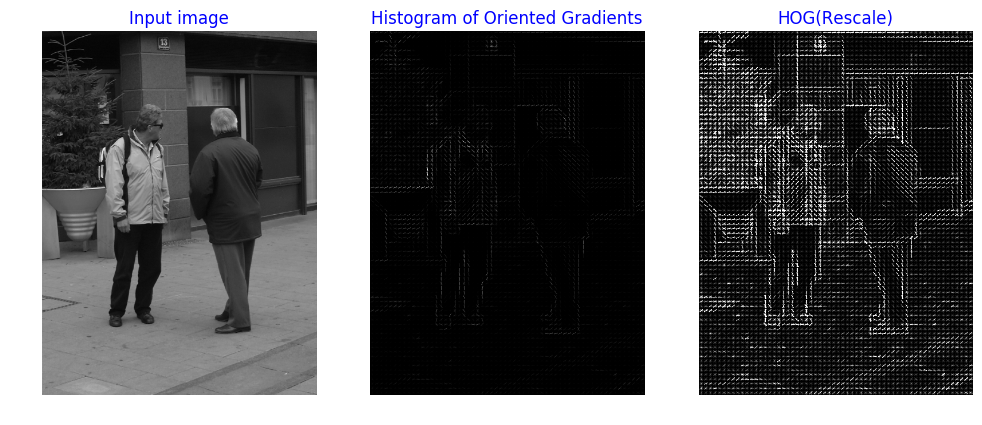

In [8]:
HOG_visualize("../persons/person_093.bmp")

### 2. Default Dector + Non-Maximum-Suppression (NMS)

Function to draw rectangle as:
1. default
2. After NMS

Ref --> http://www.pyimagesearch.com/2015/11/09/pedestrian-detection-opencv/

In [9]:
def draw_detections(orig, img, rects, thickness = 2):
    for x, y, w, h in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), thickness)
    
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    
    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(img, (xA, yA), (xB, yB), (0, 255, 0), thickness)

Default Detector + calculation of processing time

Ref --> http://www.pyimagesearch.com/2015/11/16/hog-detectmultiscale-parameters-explained/

In [35]:
def PD_default(filename):
    image = cv2.imread(filename) #read image
    orig = image.copy()
    
    hog = cv2.HOGDescriptor() #derive HOG features
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #setSVMDetector

    #pedestrian detection
    start = datetime.datetime.now()
    found, w = hog.detectMultiScale(image, winStride = (8,8), padding = (8, 8), scale = 1.15, finalThreshold = 1)
    print("[INFO] detection took: {}s".format((datetime.datetime.now() - start).total_seconds()))

    draw_detections(orig, image, found) #draw rectangles

    #write & save image
    cv2.imshow("Before NMS", orig)
    cv2.imshow("After NMS", image)
    cv2.waitKey() #for keyboard binding
    cv2.imwrite('before.jpg',orig) # save image
    cv2.imwrite('test.jpg',image) # save image

output

In [36]:
PD_default("../persons/person_174.bmp")

[INFO] detection took: 0.105s
